# CS4305TU - Assignment 2 - Regression

In this assignment, you will apply your newly obtained regression techniques with real-life data. **You should work in groups for this assignment.**

## Data source

What you will be playing with is aircraft trajectory data derived from [ADS-B](https://www.skybrary.aero/index.php/Automatic_Dependent_Surveillance_Broadcast_(ADS-B)). It is collected using the antenna from the top of the aerospace building:

<img src="https://pbs.twimg.com/media/EoBz7vVXEAAze48?format=jpg&name=medium" width="400"/>

Ensentially, ADS-B data is what you see on website like FlightRadar24:

<img src="https://media.giphy.com/media/cPutGcE0a9jdS/giphy.gif" width="400"/>

## Background

In the dataset, all flight trajectories include only the descent part of the flight. The dataset is split into two directories. One directory contains flights that are following the [Continous Descent Approach (CDA)](https://www.skybrary.aero/index.php/Continuous_Descent). The other directory contains flights that do not follow CDA. 

CDA is an operation, where the aircraft does not have any level flight segment during the descent. Follow the link above to know more.

<img src="https://1.bp.blogspot.com/-UFmjVcjmqCM/UIai54Y_wYI/AAAAAAAAAUM/tW1HTFP1IGI/s1600/image02_05_large.gif" width="400">


## Data attributes

The structures of all CSV files are the same. Here are descriptions of all columns:

- **time**: flight time in seconds, the first row starts at time 0.
- **icao**: aircraft transponder address, string format, unique for each aircraft.
- **type**: aircraft type code, string format.
- **callsign**: string format, often related to the flight number, unique for each flight.
- **latitude**: latitude coordinate in degrees.
- **longitude**: latitude coordinate  in degrees.
- **speed**: aircraft speed respective to ground, unit is in knots (1 knot = 0.51444 m/s).
- **track_angle**: direction of aircraft in relation to the true north, in degrees.
- **vertical_rate**: aircraft climb or descent speed in feet/minute (1 ft/min = 000508 m/s), negative value indicates aircraft is descending.

The most important features we are using are **time**, **altitude**, **speed**, and **vertical_rate**. 

## Instructions

The code in this notebook serves as the base for your assignment. The tasks are defined in each section.

You should implement the solutions using code cells and write your analysis using markdown cells.

Once you have complete everything, before submission, remember to restart the kernel and run all cells again. Make sure there are no errors. Then you should:

 - Save the notebook (**replace XX in the filename with your group number**)
 - Export a HTML version of the notebook. Hint: follow Mene -> File -> Download as -> HTML
 - Submit both the notebook (.ipynb) and the export (.html)


 ## References

- Quick tutorial for **Jupyter Notebook** : https://www.youtube.com/watch?v=2eCHD6f_phE

- Quick tutorial for **Jupyter Lab** (if you wish to use): https://www.youtube.com/watch?v=A5YyoCKxEOU
 

In [ ]:
import glob
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [ ]:
# loading all trajectory files

cda_files = sorted(glob.glob("data/cda/*.csv"))
noncda_files = sorted(glob.glob("data/noncda/*.csv"))

## Examples

Following two cells are some examples for data and plotting.

Remove these before submit your assignment.

In [ ]:
df_example = pd.read_csv(cda_files[0])
df_example.head(10)

,time,icao,type,callsign,latitude,longitude,altitude,speed,track_angle,vertical_rate
0,0.0,40631F,A319,EZY58YF,52.79041,2.55135,24975,445,101,-192
1,20.0,40631F,A319,EZY58YF,52.78042,2.61632,24625,441,106,-1408
2,40.0,40631F,A319,EZY58YF,52.76827,2.68098,23925,436,107,-2304
3,60.0,40631F,A319,EZY58YF,52.75611,2.74282,23225,432,107,-1984
4,80.0,40631F,A319,EZY58YF,52.74248,2.81368,22550,425,107,-1728
5,100.0,40631F,A319,EZY58YF,52.73261,2.86673,22000,420,106,-2112
6,140.0,40631F,A319,EZY58YF,52.70906,2.99515,20550,411,106,-2112
7,160.0,40631F,A319,EZY58YF,52.69504,3.07138,19900,400,106,-1344
8,180.0,40631F,A319,EZY58YF,52.68875,3.10529,19550,397,106,-2304
9,200.0,40631F,A319,EZY58YF,52.67740,3.16626,18775,396,107,-1664


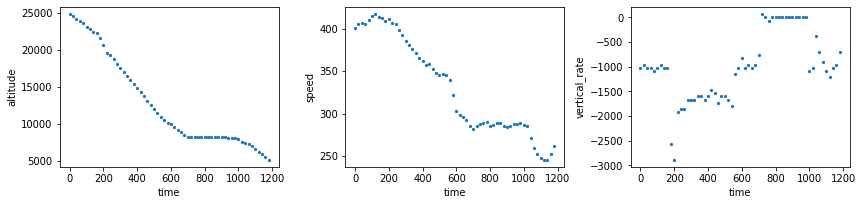

In [ ]:
# visualization example

flight_sample = pd.read_csv(noncda_files[0])

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(flight_sample.time, flight_sample.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(flight_sample.time, flight_sample.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(flight_sample.time, flight_sample.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()
plt.show()

# Task 1: Simple linear regression 

In this task you will learn how to apply simple linear regression model using a couple of flight trajectories. To complete the task, follow the steps below:

1. Use you group id as random seed, select one flight from CDA trajectories, and another one from Non-CDA trajectories

1. Inspect the relationships of (time, altitude), (time, speed), and (time, vertical_rate) for these two trajectories.

1. Apply linear regression to all three parameters for both trajectories, using time as input and altitude as output.

1. Evaluate the performance of the estimators using different error metrics.

In [ ]:
# set group_id to your own group number

group_id = 1

In [ ]:
np.random.seed(group_id)

cda_filename = np.random.choice(cda_files)
noncda_filename = np.random.choice(noncda_files)

df_cda = pd.read_csv(cda_filename)
df_noncda = pd.read_csv(noncda_filename)

type_cda = df_cda["type"].iloc[0]
type_noncda = df_noncda["type"].iloc[0]

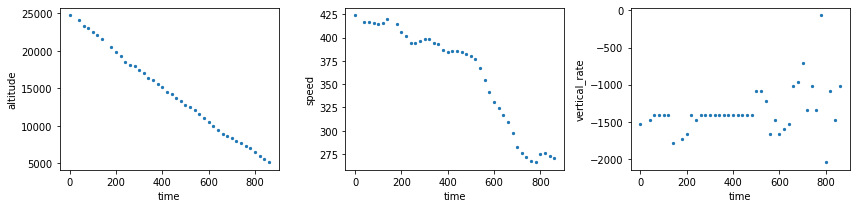

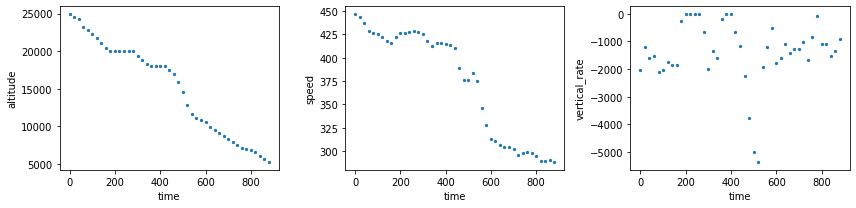

In [ ]:
# Helper funcs
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(df_cda.time, df_cda.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(df_cda.time, df_cda.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(df_cda.time, df_cda.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()


fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(df_noncda.time, df_noncda.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(df_noncda.time, df_noncda.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(df_noncda.time, df_noncda.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()


def splitting_data(initial_x, initial_y):

    test_data_x = []
    test_data_y = []
    training_data_x = []
    training_data_y = []

    #print(len(initial_x))
    list_of_random_ints = []
    for i in range(int(len(initial_x)*0.3)):
        z = np.random.randint(0, len(initial_x))
        if z in list_of_random_ints:
            i -= 1
            continue
        list_of_random_ints.append(z)
    #print(list_of_random_ints)

    for i in range(len(initial_x)):
        if i in list_of_random_ints:
            test_data_x.append(initial_x[i])
            test_data_y.append(initial_y[i])
        else:
            training_data_x.append(initial_x[i])
            training_data_y.append(initial_y[i])

    test_data_x = np.array(test_data_x)
    training_data_x = np.array(training_data_x)
    test_data_y = np.array(test_data_y)
    training_data_y = np.array(training_data_y)
    return test_data_x, test_data_y, training_data_x, training_data_y 

def plot_test_data_linear(x_pred, y_pred, x_test, y_test, x_label, y_label, title):
    fig, ax = plt.subplots(figsize = (7, 5))
    ax.scatter(x_test, y_test, marker='*', color='r', label = "test set")
    ax.plot(x_pred, y_pred, color='black', label = '\u03B2 1: {}, \u03B2 0: {}'.format(b1, b0))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.legend()
    plt.tight_layout()
    #plt.savefig(title+".png")

def mean_absolute_error(y_test, y_pred):
    return np.mean(np.abs(y_test-y_pred))

def median_absolute_error(y_test, y_pred):
    return np.median(np.abs(y_test-y_pred))

def mean_squared_error(y_test, y_pred):
    return np.mean((y_test-y_pred)**2)

def root_mean_square_error(y_test, y_pred):
    return np.sqrt(np.mean((y_test-y_pred)**2))

def r2_score(y_test, y_pred):
    var_regression = np.mean(np.sum((y_test-y_pred)**2))
    var_data = np.mean(np.sum((y_test-np.mean(y_test))**2))
    return (1 - var_regression/var_data)

non_cda mean abs ( altitude ): 	 1269.56
cda mean abs ( altitude : 	 281.88
non_cda median abs ( altitude ): 	 848.25
cda median abs ( altitude ): 	 246.48
non_cda mse ( altitude ): 	 2611345.81
cda mse ( altitude ): 	 121667.43
non_cda rmse ( altitude ): 	 1615.97
cda rmse ( altitude ): 	 348.81
non_cda r2 score: 	 0.905
cda r2 score: 	 0.984
non_cda mean abs ( speed ): 	 17.59
cda mean abs ( speed : 	 13.31
non_cda median abs ( speed ): 	 13.77
cda median abs ( speed ): 	 9.29
non_cda mse ( speed ): 	 463.87
cda mse ( speed ): 	 315.08
non_cda rmse ( speed ): 	 21.54
cda rmse ( speed ): 	 17.75
non_cda r2 score: 	 0.802
cda r2 score: 	 0.884
non_cda mean abs ( vertical_rate ): 	 1099.48
cda mean abs ( vertical_rate : 	 118.16
non_cda median abs ( vertical_rate ): 	 611.65
cda median abs ( vertical_rate ): 	 104.76
non_cda mse ( vertical_rate ): 	 2784290.3
cda mse ( vertical_rate ): 	 25585.16
non_cda rmse ( vertical_rate ): 	 1668.62
cda rmse ( vertical_rate ): 	 159.95
non_cda r2 s

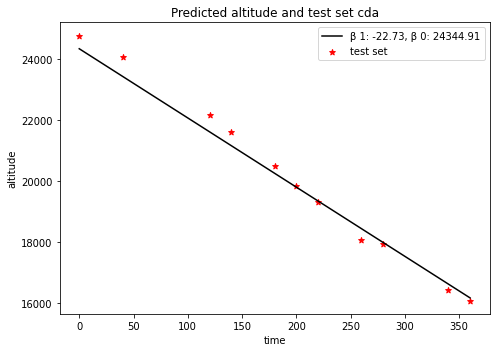

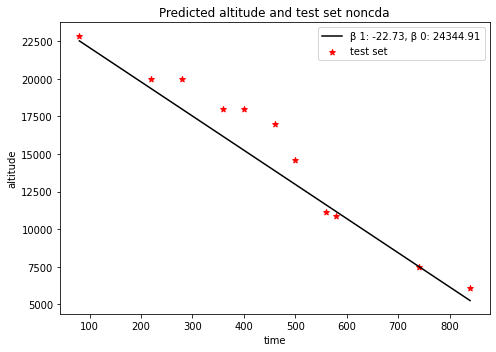

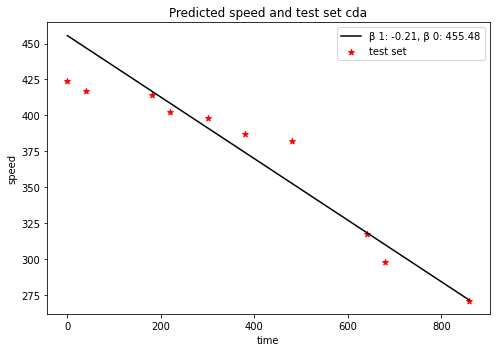

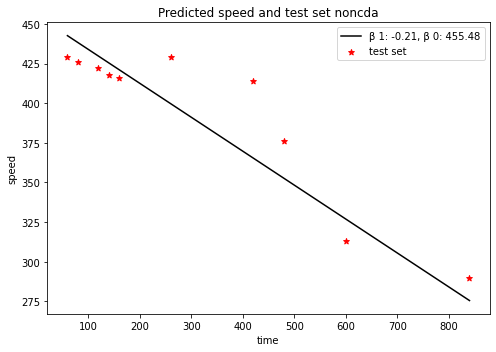

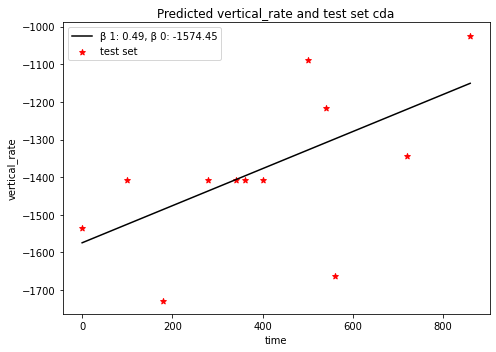

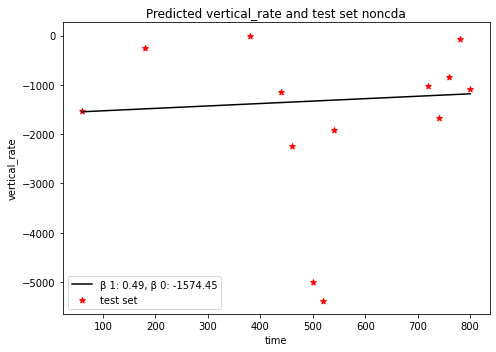

In [ ]:
from sklearn.linear_model import LinearRegression

time_values = df_cda["time"].values
time_values_noncda = df_noncda["time"].values

list_of_parameters = ["altitude", "speed", "vertical_rate"]

for parameter in list_of_parameters:
    parameter_values = df_cda[parameter].values
    time_test, parameter_test, time_training, parameter_training = splitting_data(time_values, parameter_values)
    model = LinearRegression().fit(time_training.reshape(-1, 1), parameter_training)

    b1 = model.coef_[0].round(2)
    b0 = model.intercept_.round(2)

    parameter_pred = model.predict(time_test.reshape(-1, 1))
    plot_test_data_linear(time_test, parameter_pred, time_test, parameter_test, x_label='time', y_label=parameter, title='Predicted '+ parameter + ' and test set cda')

#linear regression for noncda

    
    parameter_values_noncda = df_noncda[parameter].values
    time_test_noncda, parameter_test_noncda, time_training_noncda, parameter_training_noncda = splitting_data(time_values_noncda, parameter_values_noncda)

    model = LinearRegression().fit(time_training.reshape(-1, 1), parameter_training)

    b1 = model.coef_[0].round(2)
    b0 = model.intercept_.round(2)

    parameter_pred_noncda = model.predict(time_test_noncda.reshape(-1, 1))

    plot_test_data_linear(time_test_noncda, parameter_pred_noncda, time_test_noncda, parameter_test_noncda, x_label='time', y_label=parameter, title='Predicted '+parameter+' and test set noncda')

    print("non_cda mean abs (", parameter, "): \t", mean_absolute_error(parameter_test_noncda, parameter_pred_noncda).round(2))
    print("cda mean abs (", parameter, ": \t", mean_absolute_error(parameter_test, parameter_pred).round(2))

    print("non_cda median abs (", parameter, "): \t", median_absolute_error(parameter_test_noncda, parameter_pred_noncda).round(2))
    print("cda median abs (", parameter, "): \t", median_absolute_error(parameter_test, parameter_pred).round(2))

# Still a significantly larger error for the noncda model when compared to the cda. Makes sense as the data for noncda is not linear.
# The fact that the median is smaller for both shows us that there are some relatively large outliers. The outliers are larger for the noncda data.

    print("non_cda mse (", parameter, "): \t", mean_squared_error(parameter_test_noncda, parameter_pred_noncda).round(2))
    print("cda mse (", parameter, "): \t", mean_squared_error(parameter_test, parameter_pred).round(2))

# these errors are extremely large, which is because the unit has been squared in this error metric. Still, the cda model shows significantly better results.

    print("non_cda rmse (", parameter, "): \t", root_mean_square_error(parameter_test_noncda, parameter_pred_noncda).round(2))
    print("cda rmse (", parameter, "): \t", root_mean_square_error(parameter_test, parameter_pred).round(2))

# the root mean square error is large as outliers have a larger impact on this. As was already determined, in the noncda data the outliers are larger.

    print("non_cda r2 score: \t", r2_score(parameter_test_noncda, parameter_pred_noncda).round(3))
    print("cda r2 score: \t", r2_score(parameter_test, parameter_pred).round(3))


1. cda: time-altitude, linear; time-speed: non-linear, seems parabolic; time-vertical rate: non-linear, seems to be best described by a highorder-polynomial.
noncda: time-altitude, it seems linear but a bit distorted; time-speed: non-linear, has similar trend to the cda but is once again distorted ; time-vertical rate: Non-linear, could again be best fitted by a highorder-polynomial. It seems that the order of the polynomial for noncda needs to be higher than for the cda.
2. For all error metrics, the error is larger for noncda data than for cda data or similar in value. Additionally, based on r2 scores, we see that the linear model is a better fit for cda data than for noncda data. This makes sense as the noncda data is generally more distorted and thus more non-linear. 
Furthermore, the r2 scores clearly indicate that the linear model is the best fit to predict the altitude from the time, but the linear model is not capable of capturing the curvature in the data of the speed and vertical_rate. Still, the speed can be captured reasonably. It should be noted that for the speed, the r2 scores are similar for both noncda and cda data. 
However, for the speed, the errors are smaller than for the altitude. Still, the fit is worse because of the values of the speed as it has a smaller range than the altitude.
The worst fit is for the vertical rate because of the extreme curvature in the data. The error metrics also show the largest errors for the vertical rate. 





# Task 2: Multiple linear regression

In this task you will learn how to apply Polynomial regression model. To complete the task, follow the steps below:

1. Using the same trajectories from the previous task, but choose both speed and altitude as predictors for the vertical rate. 

1. Construct a 3D multiple linear regression model

1. Visualize your result and briefly analyze your results.

42
[12, 8, 9, 11, 5, 15, 0, 16, 1, 7, 6]
[[  424 24775]
 [  417 24075]
 [  416 22175]
 [  420 21600]
 [  414 20500]
 [  406 19850]
 [  402 19300]
 [  394 18075]
 [  396 17925]
 [  394 16425]
 [  393 16075]]
Coefficients: -276.68, -3.61, 0.02


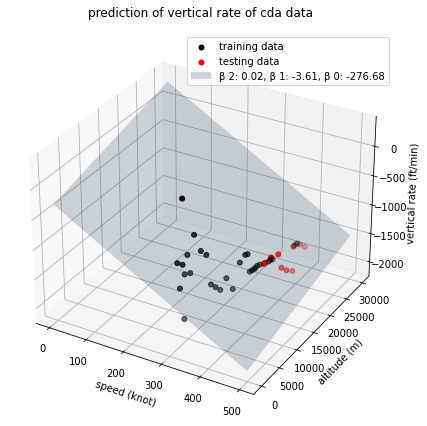

cda MAE:	 168.51
cda MedAE:	 73.06
cda RMSE:	 217.94
cda R2:	 -98.581
45
[25, 20, 37, 18, 11, 42, 28, 29, 14, 4, 23]
[[  426 22875]
 [  427 20000]
 [  428 19975]
 [  416 18025]
 [  415 18000]
 [  389 16975]
 [  376 14600]
 [  346 11125]
 [  328 10900]
 [  298  7475]
 [  290  6100]]
Coefficients: -338.87, -3.93, 0.03


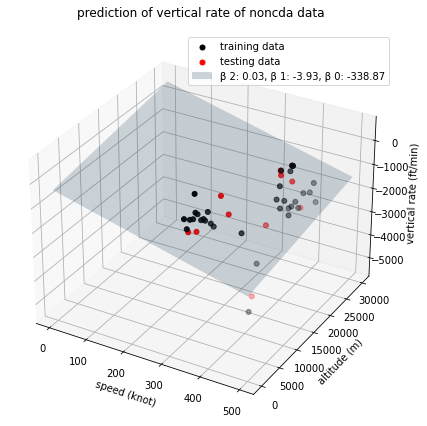

noncda MAE:	 1064.2
noncda MedAE:	 788.91
noncda RMSE:	 1398.03
noncda R2:	 -678.701


In [ ]:
# write your code here

# create more cells if needed

#%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    r2_score,
)

warnings.filterwarnings("ignore") 

def plotdata(ax):
    ax.scatter(training_data_x[:, 0], training_data_x[:, 1], training_data_z, color="k", s=25, label="training data"
    )

    ax.scatter(
        test_data_x[:, 0], test_data_x[:, 1], test_data_z, color="r", s=25, label="testing data"
    )
   
    ax.set_xlabel("speed (knot)")
    ax.set_ylabel("altitude (m)")
    ax.set_zlabel("vertical rate (ft/min)")

def splitting_data3d(initial_x, initial_y, initial_z):

    test_data_x = []
    test_data_y = []
    test_data_z = []
    training_data_x = []
    training_data_y = []
    training_data_z = []

    print(len(initial_x))
    list_of_random_ints = []
    for i in range(int(len(initial_x)*0.3)):
        a = np.random.randint(0, len(initial_x))
        if a in list_of_random_ints:
            i -= 1
            continue
        list_of_random_ints.append(a)
    print(list_of_random_ints)

    

    for i in range(len(initial_x)):
        if i in list_of_random_ints:
            test_data_x.append(np.array((initial_x[i], initial_y[i])))
    
            test_data_z.append(initial_z[i])
        else:
            training_data_x.append(np.array((initial_x[i], initial_y[i])))
            
            training_data_z.append(initial_z[i])

    test_data_x = np.array(test_data_x)
    training_data_x = np.array(training_data_x)
    #test_data_y = np.array(test_data_y)
    #training_data_y = np.array(training_data_y)
    test_data_z = np.array(test_data_z)
    training_data_z = np.array(training_data_z)
    return test_data_x, training_data_x, test_data_z, training_data_z

# loading all trajectory files

cda_files = sorted(glob.glob("data/cda/*.csv"))
noncda_files = sorted(glob.glob("data/noncda/*.csv"))


group_id = 1

np.random.seed(group_id)

cda_filename = np.random.choice(cda_files)
noncda_filename = np.random.choice(noncda_files)

df_cda = pd.read_csv(cda_filename)
df_noncda = pd.read_csv(noncda_filename)

# type_cda = df_cda["type"].iloc[0]
# type_noncda = df_noncda["type"].iloc[0]

for df, category in [(df_cda,'cda'), (df_noncda, 'noncda')]:
#linear regression for cda
    speed_values = df["speed"].values
    altitude_values = df["altitude"].values
    vertical_rate_values = df["vertical_rate"].values




    test_data_x, training_data_x, test_data_z, training_data_z = splitting_data3d(speed_values, altitude_values, vertical_rate_values)
    print(test_data_x)

    #regression
    X = np.insert(training_data_x, 0, 1, axis=1)
    Y = training_data_z.reshape(-1, 1)

    res = np.dot(X.T, X)
    res = np.dot(np.linalg.inv(res), X.T)
    res = np.dot(res, Y)

    coef = res.squeeze().round(2)

# print("Coefficients:", *coef)


# print(training_data_x)

#Implement multiple regression using Scikit-Learn


    model = LinearRegression().fit(training_data_x, training_data_z)
    b0 = model.intercept_.round(2)
    b1, b2 = model.coef_.round(2)

    print("Coefficients: {}, {}, {}".format(b0, b1, b2))

#visualize
#%matplotlib widget

    fig = plt.figure(figsize=(8, 6))
    
    fig.suptitle('prediction of vertical rate of ' + category + ' data')
    ax = fig.add_subplot(111, projection="3d")
    plotdata(ax)

  # generate and plot the plane
    x, y = np.meshgrid(range(0, 500), range(0, 30000))
    z = coef[0] + coef[1] * x + coef[2] * y

    c1 = ax.plot_surface(x, y, z, alpha=0.2, label='\u03B2 2: {}, \u03B2 1: {}, \u03B2 0: {}'.format(b2, b1, b0))
    c1._facecolors2d = c1._facecolor3d
    c1._edgecolors2d = c1._edgecolor3d
    plt.tight_layout()
    plt.legend()
    plt.show()

#evaluation



# metrics

    z_predict = coef[0] + coef[1] * test_data_x[:, 0] + coef[2] * test_data_x[:, 1]

    mae = mean_absolute_error(z_predict, test_data_z)
    print(category + " MAE:\t", mae.round(2))

    medae = median_absolute_error(z_predict, test_data_z)
    print(category +" MedAE:\t", medae.round(2))

    rmse = np.sqrt(mean_squared_error(z_predict, test_data_z))
    print(category +" RMSE:\t", rmse.round(2))

    r2 = r2_score(z_predict, test_data_z)
    print(category +" R2:\t", r2.round(3))






(this is a markdown cell)

write your analysis here

1. For the cda data, the median absolute error is 73.06 which is not very similar to the mean absolute error, which indicates it could be some extreme errors or big outlier in the test data. The RMSE value is also not similar compared with the mean absolute error so that it supposes to be some large outliers. According to the R square, the value of -98.581 indicates that the model is not a good representation of the data.
2. For the noncda data, the median absolute error is 788.91 which is not very similar to the mean absolute error, which indicates it could be some extreme errors or big outlier in the test data. The RMSE value is also not similar compared with the mean absolute error so that it supposes to be some large outliers. According to the R square, the value of -678.701 indicates that the model is not a good representation of the data, even worse than the cda model.



# Task 3: Polynomial regression

In this task you will learn how to apply Polynomial regression model. To complete the task, follow the steps below:

1. Based on previous trajectories, apply polynomial regression, using altitude as input and speed as output. 

1. Try out different orders of polynomials.

1. Analyze your choice briefly. Taking into consideration of bias-variance trade-off.

1. Applying regularization to a high-order polynomial model you have tried earlier. Write a brief analysis of your result.


----------------------------------------------------------------------
Coefficient for k =  3
            3             2
-3.099e-11 x + 7.569e-07 x + 0.00841 x + 196.2
----------------------------------------------------------------------
----------------------------------------------------------------------
Coefficient for k =  5
            5             4             3             2
-2.022e-18 x + 1.571e-13 x - 4.663e-09 x + 6.488e-05 x - 0.4043 x + 1175
----------------------------------------------------------------------
----------------------------------------------------------------------
Coefficient for k =  8
            8             7             6             5             4
-4.075e-30 x + 5.011e-25 x - 2.627e-20 x + 7.618e-16 x - 1.327e-11 x
              3             2
 + 1.411e-07 x - 0.0008839 x + 2.973 x - 3841
----------------------------------------------------------------------
----------------------------------------------------------------------
Coefficient for

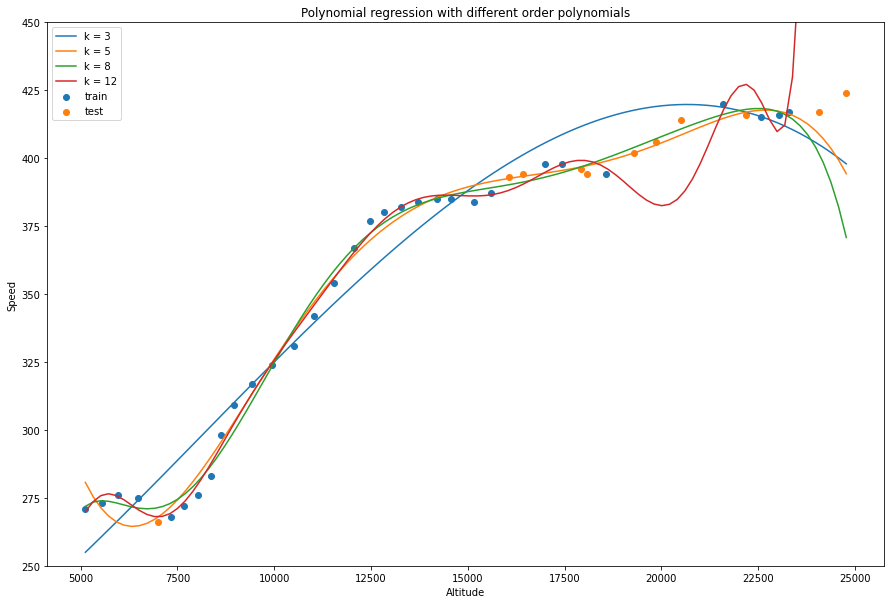

In [ ]:
speed_values = df_cda["speed"].values
altitude_values = df_cda["altitude"].values

np.random.seed(group_id)
alt_test, spe_test, alt_train, spe_train = splitting_data(altitude_values, speed_values)

def print_model(coef, k):
    print("-" * 70)
    print("Coefficient for k = ", k)
    print(np.poly1d(coef[::-1]))
    print("-" * 70)


def plot_poly(ax, x, coef, k):
    x_ = np.linspace(min(x), max(altitude_values), 100)
    y_ = np.zeros(len(x_))
    for i, c in enumerate(coef):
        y_ += c * x_**i
    ax.plot(x_, y_, label="k = " + str(k))

# visualization
plt.figure(figsize=(15,10))
plt.scatter(alt_train, spe_train, label="train")
plt.scatter(alt_test, spe_test, label="test")


for k in [3, 5, 8, 12]:
    coef_np = np.polyfit(alt_train, spe_train, deg=k)
    coef = coef_np[::-1]
    print_model(coef, k)
    ax = plt.gca()
    plot_poly(ax, alt_train, coef, k)
plt.xlabel('Altitude')
plt.ylabel('Speed')
plt.title('Polynomial regression with different order polynomials')
plt.legend()
plt.ylim(250,450)
plt.show()

As can be seen in the plot above, it's easy to overfit to the training data when using a too high order polynomial. When using k=12, the line fluctuates a lot in order to more accurately fit to the training points, but this line does not necessarily predict the test points anymore. On the other hand, using a lower k of 3 for example is also not ideal because it will be underfitted. This line has way too much variance to accurately predict even the training data.

We want to find the line which accurately captures the regularities in its training data, but also generalizes well to unseen data. In this case, k=5 seems to be a good option.






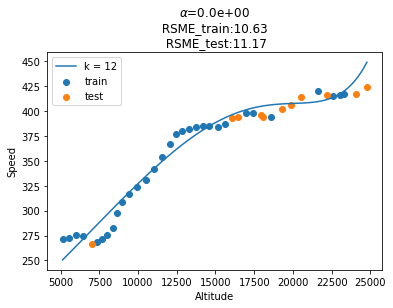

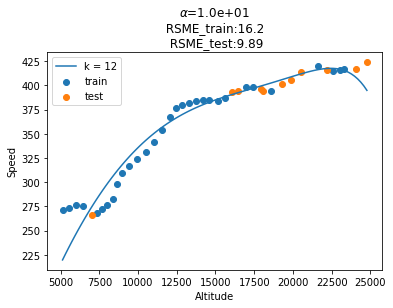

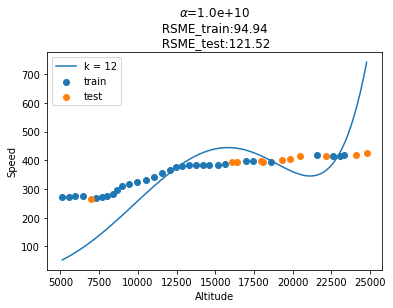

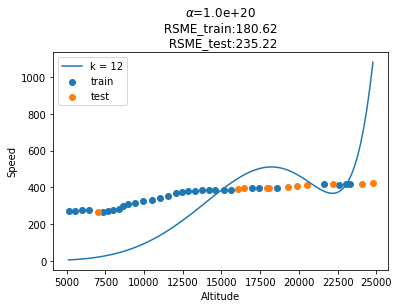

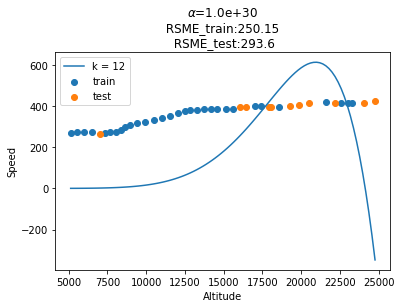

In [ ]:
# Regularization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

k = 12
alphas = [0, 1e1, 1e10, 1e20, 1e30]

X_train = alt_train.reshape(-1, 1)
X_test = alt_test.reshape(-1, 1)

for i, alpha in enumerate(alphas):
    ax = plt.gca()

    model = make_pipeline(PolynomialFeatures(k), Lasso(alpha=alpha, fit_intercept=False))
    model.fit(X_train, spe_train)

    coef = model['lasso'].coef_

    RSME_train = np.sqrt(mean_squared_error(spe_train, model.predict(X_train))).round(2)
    RSME_test = np.sqrt(mean_squared_error(spe_test, model.predict(X_test))).round(2)

    plt.scatter(alt_train, spe_train, label="train")
    plt.scatter(alt_test, spe_test, label="test")
    plot_poly(ax, alt_train, coef, k)
    ax.set_title('$\\alpha$={:.1e} \n RSME_train:{} \n RSME_test:{}'.format(alpha, RSME_train, RSME_test))
    ax.legend(loc="upper left")
    plt.xlabel('Altitude')
    plt.ylabel('Speed')
    plt.show()


Using an alpha of 1e10 Seems to give the best results for L1 regularization. For higher numbers, the coefficients are penalised too much, resulting in a poor fit. 1e10 yields the best RSME.

# Task 4: Logistic regression

In this task you will learn how to apply Logistic regression model. You need to generate a new dataset based on given data. To complete the task, follow the steps below:

1. For all trajectories in CDA and NON-CDA group, apply linear regression, using time as input and altitude as output.

1. Calculate MAE for all regression models. Construct a dataset with MAE as input, and CDA status as output (CDA as 0, and NON-CDA as 1).

1. Determine the Logistic regression model describe the relationship between MAE and CDA status

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

def calcMAE(df):
    # complete this function for calculating MAE
    time_log = df.time.values
    altitude_log = df.altitude.values

    time_test_log, alt_test_log, time_train_log, alt_train_log = splitting_data(time_log, altitude_log)

    # train linear regression
    reg = LinearRegression().fit(time_train_log.reshape(-1, 1), alt_train_log)
    preds = reg.predict(time_test_log.reshape(-1,1))

    return mean_absolute_error(preds, alt_test_log) 


new_data = []

for f in cda_files:
    df = pd.read_csv(f)
    MAE = calcMAE(df)
    new_data.append((MAE, 0))

for f in noncda_files:
    df = pd.read_csv(f)

    MAE = calcMAE(df)
    new_data.append((MAE, 1))

new_df = pd.DataFrame(new_data, columns =['MAE', 'noncda'])

intercept: -11.48859325876886, slope: 0.016967419705853658


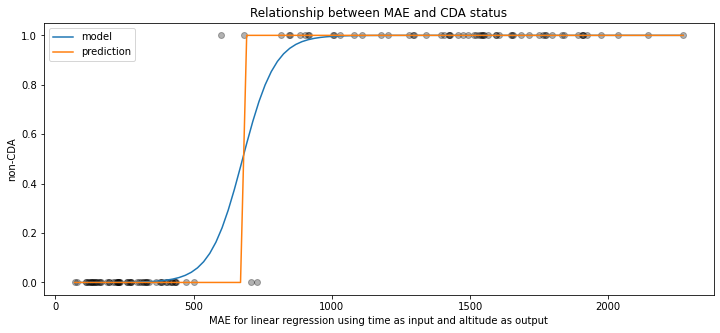

In [ ]:
def expit(x):
    return 1 / (1 + np.exp(-x))

# fit logistic model
X_log = new_df.MAE.values.reshape(-1,1)
y_log = new_df.noncda.values
logreg = LogisticRegression().fit(X_log, y_log)

print("intercept: {}, slope: {}".format(logreg.intercept_[0], logreg.coef_[0][0]))

#create model for visualization
X_test_log = np.linspace(min(X_log), max(X_log), 100)
model_log = expit(X_test_log * logreg.coef_ + logreg.intercept_).squeeze()
predictions_log = logreg.predict(X_test_log.reshape(-1, 1))

#visualization
plt.figure(figsize=(12,5))
plt.scatter(X_log, y_log, alpha=0.3, color="k")
plt.plot(X_test_log, model_log, label='model')
plt.plot(X_test_log, predictions_log, label='prediction')
plt.xlabel('MAE for linear regression using time as input and altitude as output')
plt.ylabel('non-CDA')
plt.title('Relationship between MAE and CDA status')
plt.legend()
plt.show()

Above is the Logistic regression model which describes the relationship between MAE and CDA status. From a mean absolute error of roughly 610, the model predicts the trajectory is non-CDA. This indicates that CDA trajectories can be more easily modelled used linear regression, as they tend to have a lower MAE overall.






# Task 5: Bayesian regression

In this task you will learn how to apply Bayesian regression model. I recommend to use of `pymc3` library. To complete the task, follow the steps below:

1. Apply Bayesian linear regression to vertical speed of CDA and Non-CDA trajectories (time as input). Provide an analysis of your result.

1. **(Bonus)** Design a quadratic model to altitude using the Bayesian regression approach. Visualize and analyze your findings.



(1)

Sequential sampling (4 chains in 1 job)
NUTS: [sigma, beta_1, beta_0]


Sampling 4 chains for 4_000 tune and 5_000 draw iterations (16_000 + 20_000 draws total) took 48 seconds.
The acceptance probability does not match the target. It is 0.882313521256224, but should be close to 0.8. Try to increase the number of tuning steps.
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, beta_1, beta_0]


Sampling 4 chains for 4_000 tune and 5_000 draw iterations (16_000 + 20_000 draws total) took 48 seconds.


<Figure size 504x504 with 0 Axes>

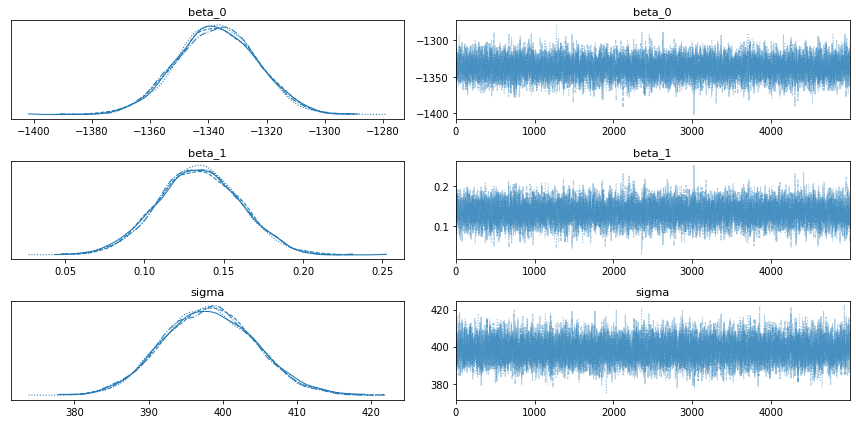

<Figure size 504x504 with 0 Axes>

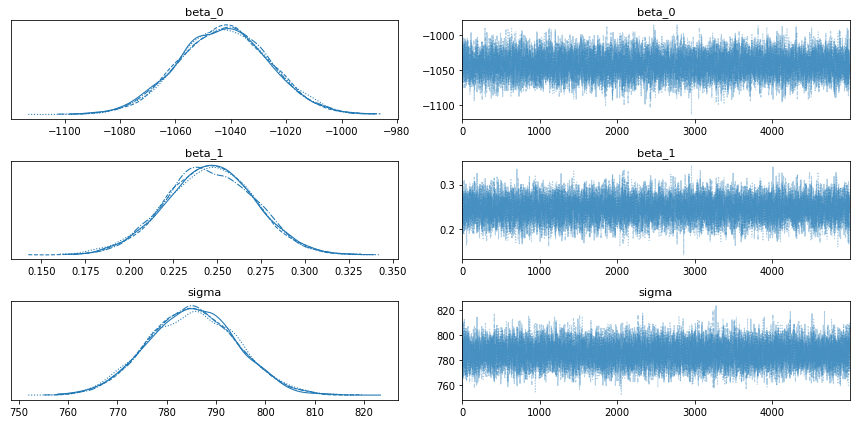

In [ ]:
import pymc3 as pm #Pymc3 must be installed first: anaconda prompt > pip install pymc3


li = []

for filename in cda_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_cda = pd.concat(li, axis=0, ignore_index=True)

li2 = []

for filename in noncda_files:
    df2 = pd.read_csv(filename, index_col=None, header=0)
    li2.append(df2)

df_noncda = pd.concat(li2, axis=0, ignore_index=True)

x_train_cda = df_cda.time.values
x_train_noncda = df_noncda.time.values
y_train_cda = df_cda.vertical_rate.values
y_train_noncda = df_noncda.vertical_rate.values

#Bayesian regression for CDA files
with pm.Model() as model:
    beta_0 = pm.Normal("beta_0", mu=-750, sd=20)
    beta_1 = pm.Normal("beta_1", mu=0, sd=20)
    sigma = pm.HalfNormal("sigma", sd=50)

    y = pm.Normal("y", mu=beta_0 + beta_1 * x_train_cda, sd=sigma, observed=y_train_cda)

    # using the simplest MH sampler
    step = pm.NUTS()
    
    # we are drawing 5000 samples using 4 chains
    trace = pm.sample(tune=4000,draws=5000, step=step, chains=4)

#Bayesian reression for Non CDA files
with pm.Model() as model:
    beta_0 = pm.Normal("beta_0", mu=-750, sd=20)
    beta_1 = pm.Normal("beta_1", mu=0, sd=20)
    sigma = pm.HalfNormal("sigma", sd=50)

    y = pm.Normal("y", mu=beta_0 + beta_1 * x_train_noncda, sd=sigma, observed=y_train_noncda)

    # using the simplest MH sampler
    step = pm.NUTS()
    
    # we are drawing 5000 samples using 4 chains
    trace2 = pm.sample(tune=4000,draws=5000, step=step, chains=4)

plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
pm.traceplot(trace2)
plt.tight_layout()
plt.show()

Once the sampling is complete, it is possible to show the posterior probability distribution for the variables beta_0, beta_1 and sigma from the drawn samples. From this distribution the following can be observed:

CDA files
-	Beta_0 converges around -1340
-	Beta_1 converges around 0.14
-	Sigma converges around 398
Non CDA files
-	Beta_0 converges around -1055
-	Beta_1 converges around 0.23
-	Beta_2 converges around 785
The amount of tuning when sampling was increased from the default (1000) to 4000. This ensures that the acceptance probability matches that of the target which was set at 0.8.

The posterior probability distribution also shows the individual distributions per chain. It can be observed that all the variables have the same distribution type for each chain which is a good sign for the convergence.





(2)

In [ ]:
x_train_cda = df_cda.speed.values
x_train_noncda = df_noncda.speed.values
y_train_cda = df_cda.altitude.values
y_train_noncda = df_noncda.altitude.values

Sequential sampling (4 chains in 1 job)
NUTS: [sigma, beta_2, beta_1, beta_0]


Sampling 4 chains for 4_000 tune and 5_000 draw iterations (16_000 + 20_000 draws total) took 227 seconds.


<Figure size 504x504 with 0 Axes>

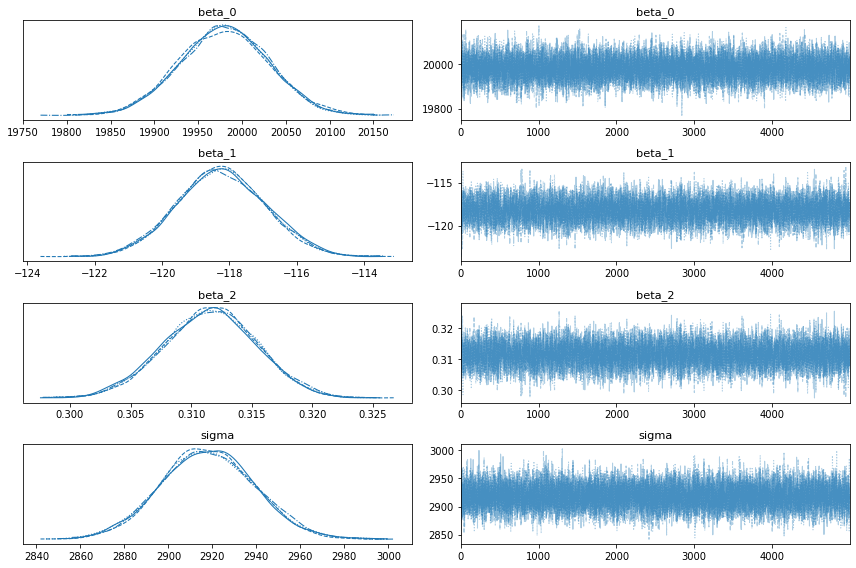

Sequential sampling (4 chains in 1 job)
NUTS: [sigma, beta_2, beta_1, beta_0]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 186 seconds.


<Figure size 504x504 with 0 Axes>

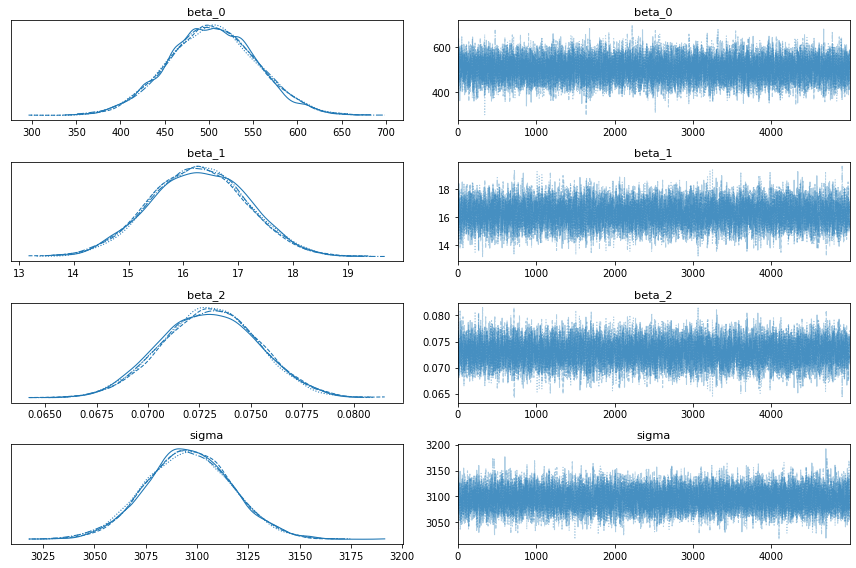

In [ ]:


from common import plot_data
with pm.Model() as model:
    beta_0 = pm.Normal("beta_0", mu=20000, sd=50)
    beta_1 = pm.Normal("beta_1", mu=0, sd=50)
    beta_2 = pm.Normal("beta_2", mu=0, sd=50)
    sigma = pm.HalfNormal("sigma", sd=50)

    y = pm.Normal("y", mu=beta_0 + beta_1 * x_train_cda + beta_2 * x_train_cda**2, sd=sigma, observed=y_train_cda)

    # using the simplest MH sampler
    step = pm.NUTS()
    
    # we are drawing 5000 samples using 4 chains
    trace3 = pm.sample(tune=4000,draws=5000, step=step, chains=4)



plt.figure(figsize=(7, 7))
pm.traceplot(trace3)
plt.tight_layout()
plt.show()


with pm.Model() as model:
    beta_0 = pm.Normal("beta_0", mu=500, sd=50)
    beta_1 = pm.Normal("beta_1", mu=50, sd=50)
    beta_2 = pm.Normal("beta_2", mu=0, sd=50)
    sigma = pm.HalfNormal("sigma", sd=50)

    y = pm.Normal("y", mu=beta_0 + beta_1 * x_train_noncda + beta_2 * x_train_noncda**2, sd=sigma, observed=y_train_noncda)

    # using the simplest MH sampler
    step = pm.NUTS()
    
    # we are drawing 5000 samples using 4 chains
    trace4 = pm.sample(tune=2000,draws=5000, step=step, chains=4)



plt.figure(figsize=(7, 7))
pm.traceplot(trace4)
plt.tight_layout()
plt.show()

The assignment stated to create a quadratic model for the altitude using Bayesian regression. Usually, the Bayesian regression is used with a linear function such as Y = B0 + B1*X.
This has been altered to obtain a quadratic model such as that is used for a polynomial regression. This gives n+1 amount of variables for the following equation: Y = B0 + B1 * X + B2 * X^2 … B(N+1) * X^(N+1)
In this case the N was kept at 2 which resulted in Y = B0 + B1 * X + B2 * X^2. Using the Bayesian regression technique multiple chains containing samples were created. The amount of tuning when sampling has been altered from the default of 1000 to 4000 and 2000 for respectivel ythe CDA and non CDA files. This was to ensure that the acceptance probability is close to the target of 0.8. The following values for the variables have been observed:

CDA files:
-   Beta_0  has a convergence at 19975
-   Beta_1 has a convergence at -119
-   Beta_2 has a convergence at 0.313
-   Sigma has a convergence at 2920

Non CDA files:
-   Beta_0 has a convergence at 500
-   Beta_1 has a convergence at 16.5
-   Beta_2 has a convergence at 0.0725
-   Sigma has a convergence at 3090

It can be observed from the graphs that the distributions from the chains are very similar to those of their respective variable. This is a good sign for the convergence as it can therefore be easily observed from the distributions. These are good signs that the obtained variables are a proper fit tot he training data. However, it is rather odd that the beta_0 value for the non CDA files is so low compared to that of the CDA files. In order to determine the capability of the model to predict the altitude, it must be subject to accuracy methods such as a RMSE for example. 




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b067a33-3e19-4fd1-b206-4389ea61a394' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>